In [1]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

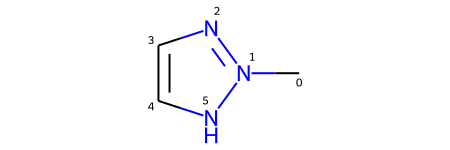

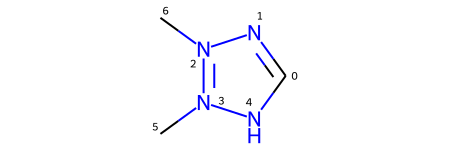

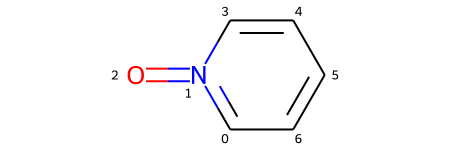

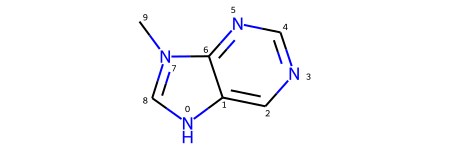

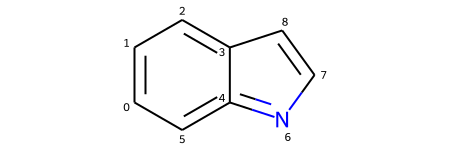

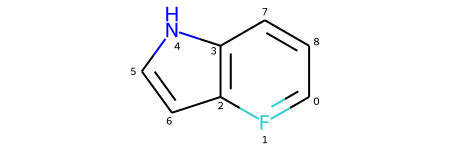

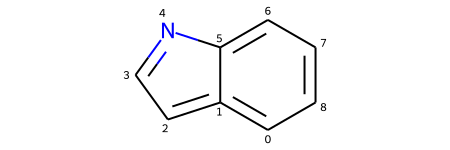

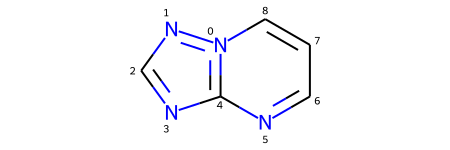

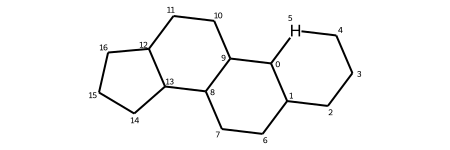

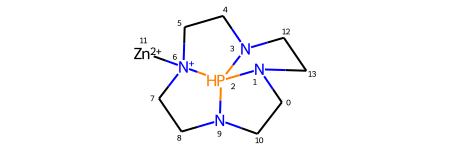

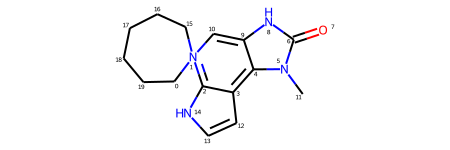

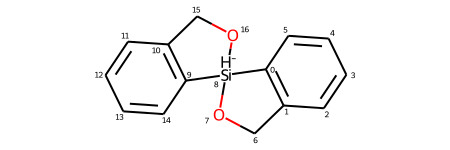

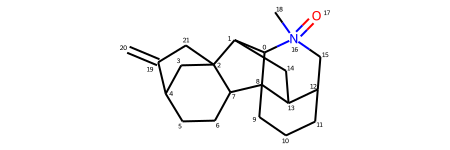

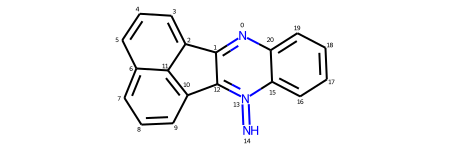

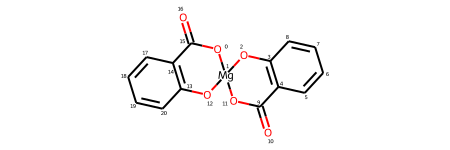

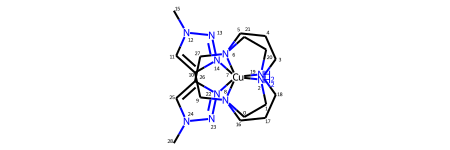

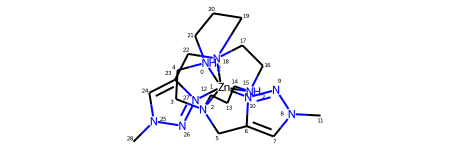

CPU times: user 96.7 ms, sys: 12.8 ms, total: 109 ms
Wall time: 115 ms


In [85]:
%%time
# smi = 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5'  # 422 us
# smi = 'CC(C)(C#CC1=NC(=C(C=C1)C2=C3C(=C(C=C2)Cl)C(=NN3CC(F)(F)F)NS(=O)(=O)C)C(CC4=CC(=CC(=C4)F)F)NC(=O)CN5C6=C(C7CC7C6(F)F)C(=N5)C(F)(F)F)S(=O)(=O)C'  # 501 us
# smi = '[nH]1cccc1'
# smi = '[bH2-]1cccc1'
# smi = 'C(C(C(C(C(C)C)C)C)C)C'
smiles = """
CN1=NC=CN1
C1=NN(=N(N1)C)C
C1=N(=O)C=CC=C1
N1C2=CN=CN=C2N(=C1)C
C1=CC=C2C(=C1)=NC=C2
C1=FC2=C(NC=C2)C=C1
C1=C2=CC=NC2=CC=C1
N=12=NC=NC1N=CC=C2
C12C(CCC[H]1)CCC3C2CCC4C3CCC4
C1N2P34N(CC[N+]3(CCN4C1)[Zn+2])CC2
C1N2(=C3C(=C4N(C(=O)NC4=C2)C)C=CN3)CCCCC1
C12=C(C=CC=C1)CO[SiH-]23C4=C(C=CC=C4)CO3
C12C3C45CC(CCC4C16CCCC(C6C3)CN2(=O)C)C(=C)C5
N1=C2C3=CC=CC4=CC=CC(=C34)C2=N(=N)C5=CC=CC=C51
O1[Mg]2(OC3=C(C=CC=C3)C(=O)O2)OC4=C(C1=O)C=CC=C4
C1C[NH2]2CCCN34[Cu]256(N1(CC7=CN(N=N57)C)CCC[NH2]6CC3)N8=NN(C=C8C4)C
[NH2]12[Zn]3456N(CC1)(CC7=CN(N=N73)C)CCC[NH2]4CCN5(CCC2)CC8=CN(N=N68)C
"""
for smi in smiles.split():
    mol = Chem.MolFromSmiles(smi, sanitize=False)
    display(mol)

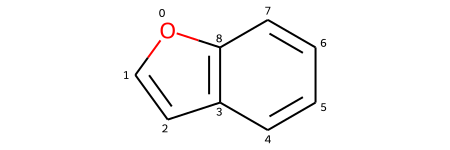

'c1ccc2occc2c1'

In [110]:
# smi = 'c1cc2c(ccc3ccoc32)[nH]1'
# smi = 'O=c1ccn2ccccn12'
# smi = 'c1cccc(CCC2)c12'
# smi = 'C1=Ccccc1'
# smi = 'c1ccccc1'
# smi = 'c1ccc2ccccc2c1'
# smi = 'c1ccc2cc(Cc3ccc4ccccc4c3)ccc2c1'
# smi = 'c1ccc(Cc2ccc3ccccc3c2)cc1'
smi = 'o1ccc(cccc2)c12'
mol = Chem.MolFromSmiles(smi)
display(mol)

Chem.MolToSmiles(mol)

In [103]:
Chem.Kekulize(mol)

for atom in mol.GetAtoms():
    print(atom.GetIsAromatic())

True
True
True
True
True
True
True
True
True
True


In [2]:
s = """
    H , He,
    Li, Be, B , C , N , O , F , Ne,
    Na, Mg, Al, Si, P , S , Cl, Ar,
    K , Ca, Sc, Ti, V , Cr, Mn, Fe, Co, Ni, Cu, Zn, Ga, Ge, As, Se, Br, Kr,
    Rb, Sr, Y , Zr, Nb, Mo, Tc, Ru, Rh, Pd, Ag, Cd, In, Sn, Sb, Te, I , Xe,
    Cs, Ba,     Hf, Ta, W , Re, Os, Ir, Pt, Au, Hg, Tl, Pb, Bi, Po, At, Rn,
    Fr, Ra,     Rf, Db, Sg, Bh, Hs, Mt, Ds, Rg, Cn, Nh, Fl, Mc, Lv, Ts, Og,
    La, Ce, Pr, Nd, Pm, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu,
    Ac, Th, Pa, U , Np, Pu, Am, Cm, Bk, Cf, Es, Fm, Md, No, Lr,
"""

In [51]:
for symbol in s.split(','):
    symbol = symbol.strip()
    if symbol in ['', 'H']: continue
    atom = Chem.Atom(symbol)
    atom.SetIsotope(3)
    # print(f'    else if symbol == "{symbol.lower()}" ' + '{ ' + f'Ok(AtomicSymbol::{symbol})' + ' }')
    # print(f'        AtomicSymbol::{symbol} => "{symbol}",')
    # print(f'        AtomicSymbol::{symbol} => {atom.GetMass()},')
    try:
        atom = Chem.Atom(symbol)
        isotope = round(atom.GetMass())
        print(f'        AtomicSymbol::{symbol} => {isotope},')
    except: pass
    # try:
        # mol = Chem.MolFromSmiles(symbol)
        # atom = mol.GetAtoms()[0]
        # total_num_hs = atom.GetTotalNumHs()
        # # print(symbol, atom.GetTotalNumHs())
        # print(f'    else if symbol == "{symbol}" ' + '{ ' + f'Ok({total_num_hs})' + ' }')
    # except: pass
    # mol = Chem.MolFromSmiles(f'[{symbol}]')
    # exact_mw = CalcExactMolWt(mol)
    # print(f'    else if symbol == "{symbol}" ' + '{ ' + f'Ok({round(exact_mw)})' + ' }')

        AtomicSymbol::He => 4,
        AtomicSymbol::Li => 7,
        AtomicSymbol::Be => 9,
        AtomicSymbol::B => 11,
        AtomicSymbol::C => 12,
        AtomicSymbol::N => 14,
        AtomicSymbol::O => 16,
        AtomicSymbol::F => 19,
        AtomicSymbol::Ne => 20,
        AtomicSymbol::Na => 23,
        AtomicSymbol::Mg => 24,
        AtomicSymbol::Al => 27,
        AtomicSymbol::Si => 28,
        AtomicSymbol::P => 31,
        AtomicSymbol::S => 32,
        AtomicSymbol::Cl => 35,
        AtomicSymbol::Ar => 40,
        AtomicSymbol::K => 39,
        AtomicSymbol::Ca => 40,
        AtomicSymbol::Sc => 45,
        AtomicSymbol::Ti => 48,
        AtomicSymbol::V => 51,
        AtomicSymbol::Cr => 52,
        AtomicSymbol::Mn => 55,
        AtomicSymbol::Fe => 56,
        AtomicSymbol::Co => 59,
        AtomicSymbol::Ni => 59,
        AtomicSymbol::Cu => 64,
        AtomicSymbol::Zn => 65,
        AtomicSymbol::Ga => 70,
        AtomicSymbol::Ge => 73,
        AtomicSymbol